In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = [6.4, 4.8]
from datetime import datetime

In [2]:
data = pd.read_csv(r"C:/Users/piyus/Desktop/Review 2/ires.csv")
data.shape
# parsing string to a date time type
data['months']=pd.to_datetime(data['months'], infer_datetime_format=True)
data=data.set_index(['months'])
print(data)

            total gallons
months                   
2012-01-01        1902200
2012-01-02        1661500
2012-01-03        1694100
2012-01-04        2490100
2012-01-05        4261400
...                   ...
2018-01-05        3970000
2018-01-06        4277200
2018-01-07        4663400
2018-01-08        6301200
2018-01-09        4987300

[81 rows x 1 columns]


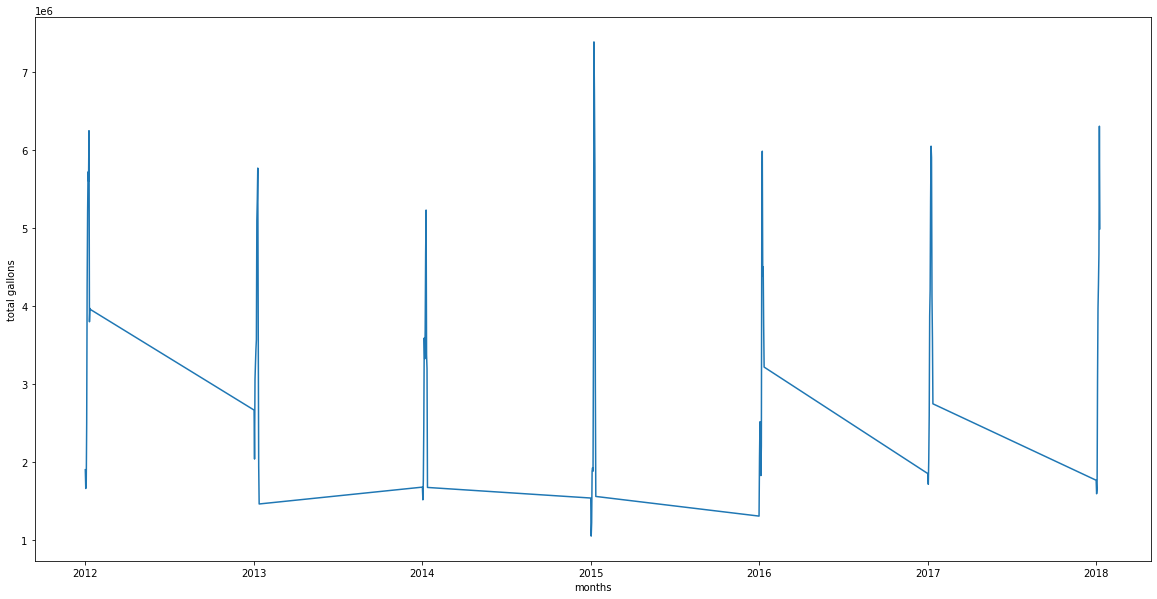

In [3]:
# Plotting Graph
plt.figure(figsize=(20,10))
plt.xlabel("months")
plt.ylabel("total gallons")
plt.plot(data)

In [4]:
# Determining Rolling Statistics
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean)
print(rolstd)

            total gallons
months                   
2012-01-01            NaN
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
...                   ...
2018-01-05   3.664425e+06
2018-01-06   3.670683e+06
2018-01-07   3.613633e+06
2018-01-08   3.634950e+06
2018-01-09   3.558817e+06

[81 rows x 1 columns]
            total gallons
months                   
2012-01-01            NaN
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
...                   ...
2018-01-05   1.573999e+06
2018-01-06   1.576478e+06
2018-01-07   1.521697e+06
2018-01-08   1.560164e+06
2018-01-09   1.458517e+06

[81 rows x 1 columns]


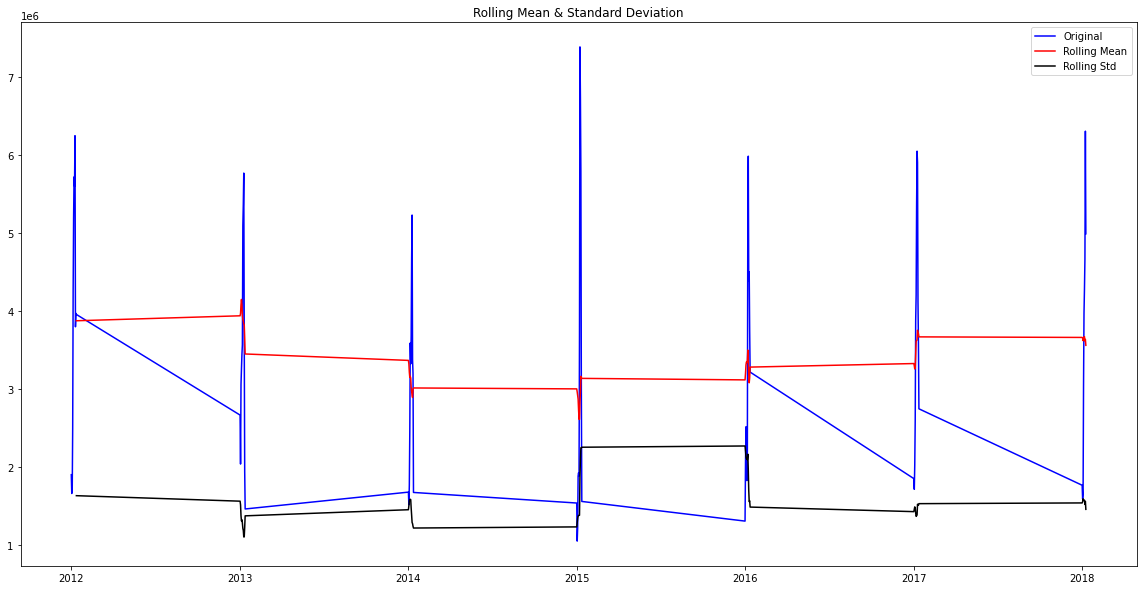

In [5]:
# plotting rolling stastics
plt.figure(figsize=(20,10))
original=plt.plot(data, color='blue', label='Original')
mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [6]:
# Performing Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results For Dickey-Fuller Test: ')
dftest=adfuller(data['total gallons'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results For Dickey-Fuller Test: 
Test Statistic          -1.794383
p-value                  0.383254
Lags Used               10.000000
No. of Obs              70.000000
Critical Value (1%)     -3.527426
Critical Value (5%)     -2.903811
Critical Value (10%)    -2.589320
dtype: float64


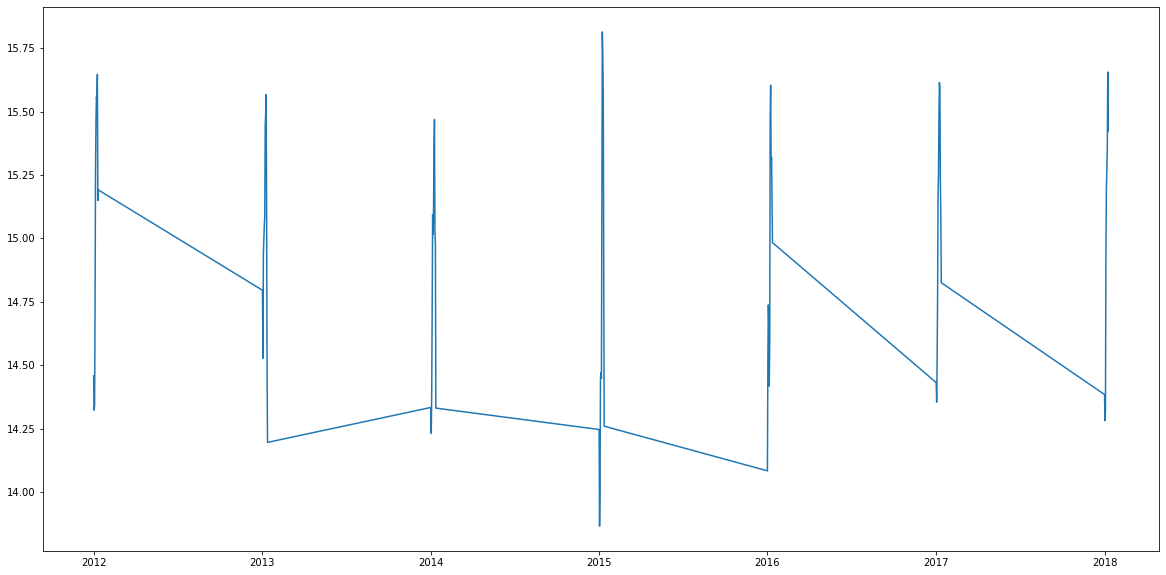

In [7]:
# Estimating Trends
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

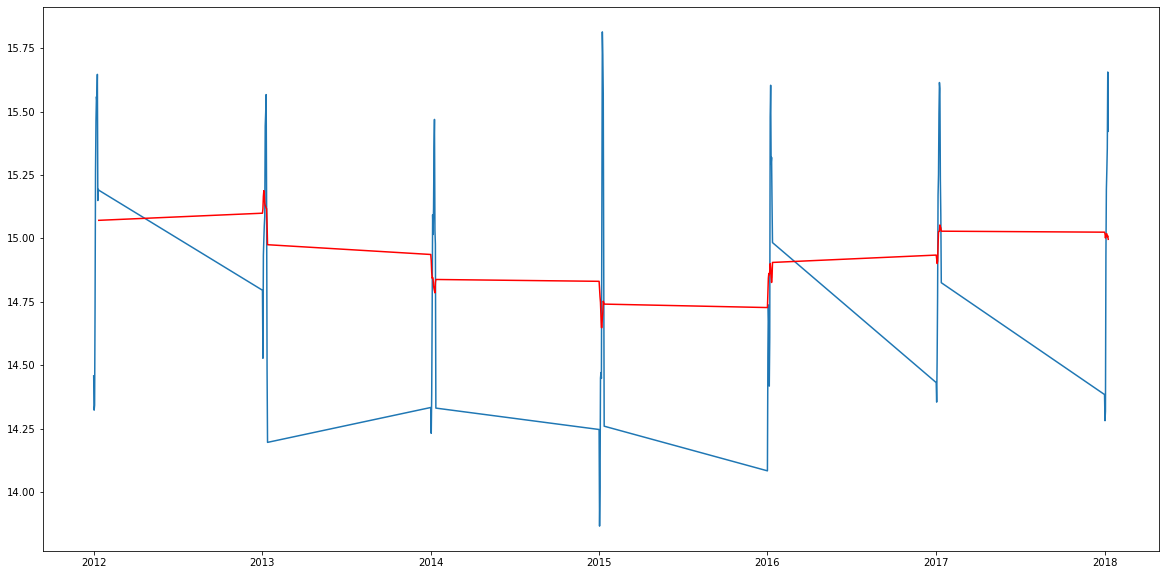

In [8]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='red')

In [9]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,total gallons
months,
2012-01-12,0.118816
2013-01-01,-0.303702
2013-01-02,-0.588958
2013-01-03,-0.231699
2013-01-04,-0.191534


In [10]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='blue', label='original')
    mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['total gallons'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

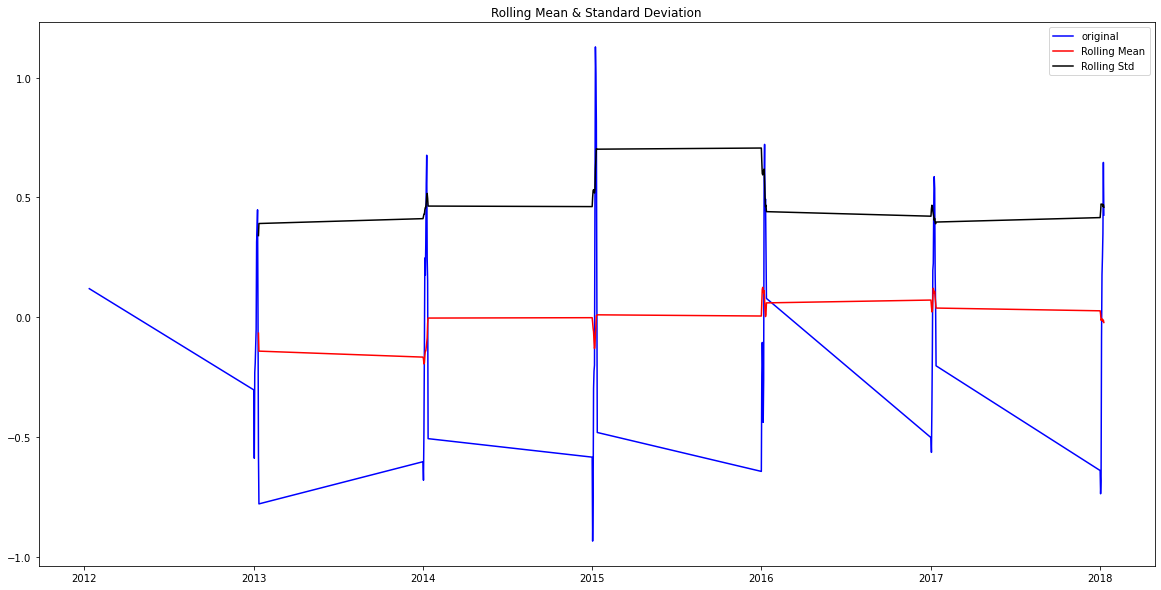

Dickey-Fuller Test: 
Test Statistic          -5.567176
p-value                  0.000001
Lags Used                6.000000
No. of Obs              63.000000
Critical Value (1%)     -3.538695
Critical Value (5%)     -2.908645
Critical Value (10%)    -2.591897
dtype: float64


In [11]:
stationarity(data_log_diff)

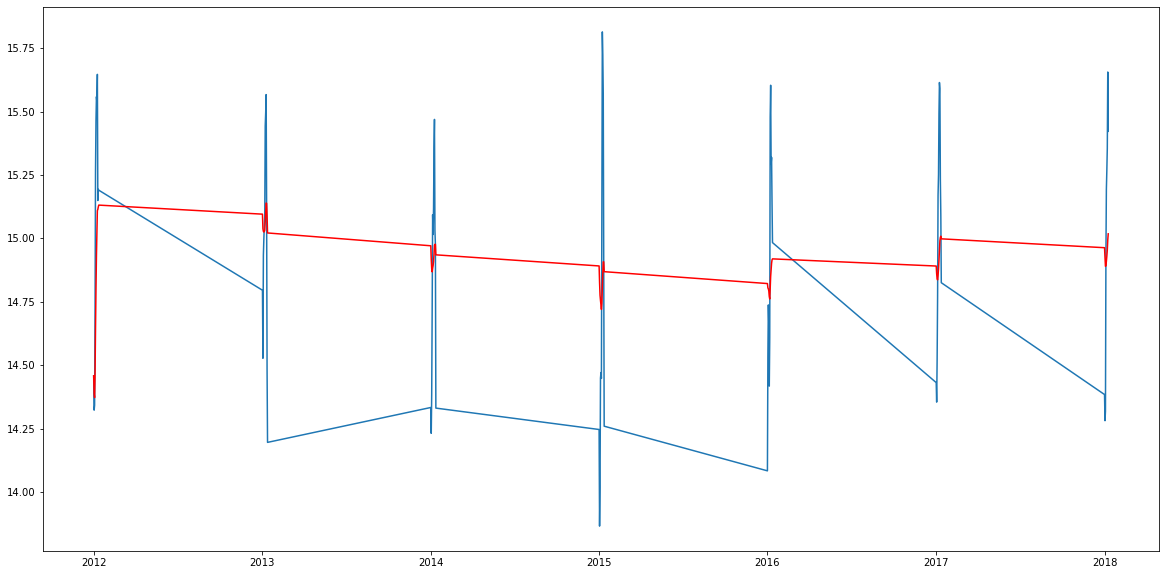

In [12]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='red')

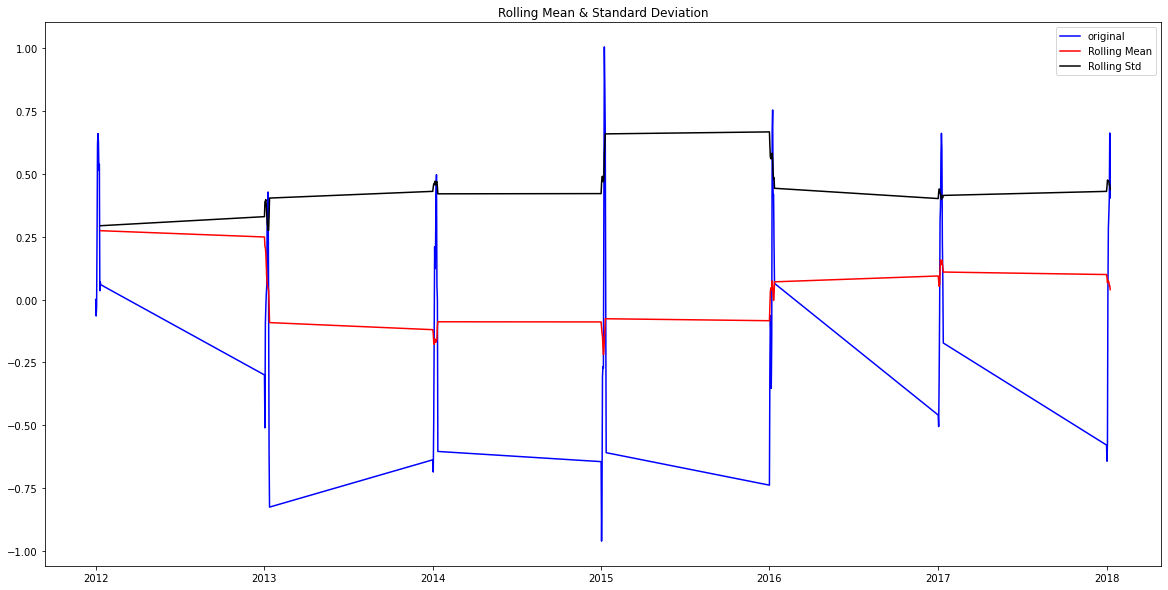

Dickey-Fuller Test: 
Test Statistic         -6.479790e+00
p-value                 1.303663e-08
Lags Used               4.000000e+00
No. of Obs              7.600000e+01
Critical Value (1%)    -3.519481e+00
Critical Value (5%)    -2.900395e+00
Critical Value (10%)   -2.587498e+00
dtype: float64


In [13]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

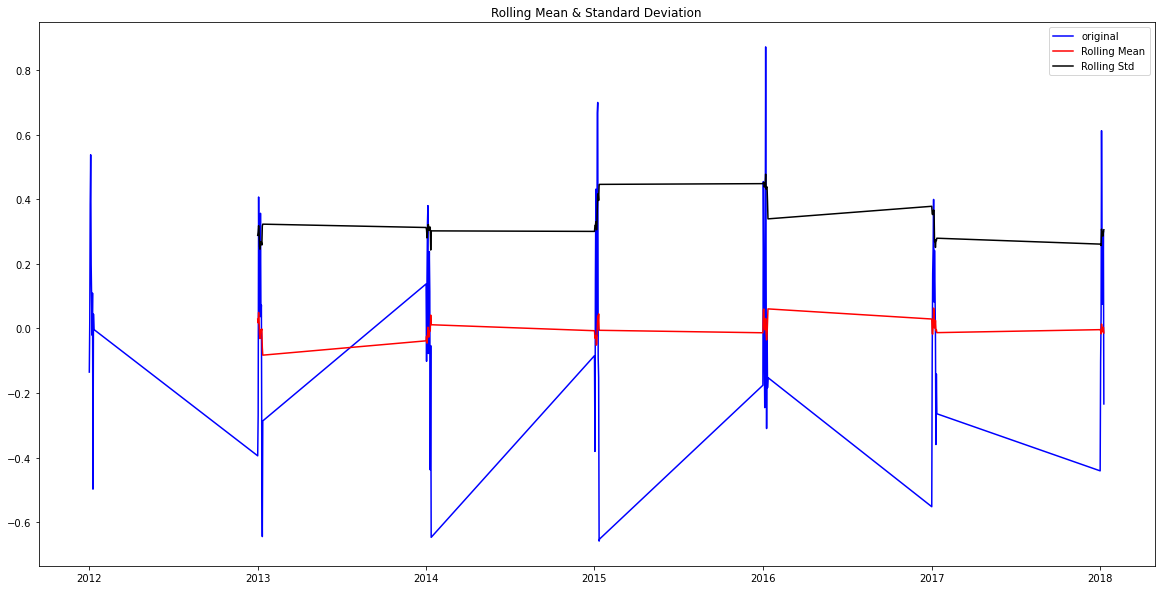

Dickey-Fuller Test: 
Test Statistic         -7.085975e+00
p-value                 4.537587e-10
Lags Used               9.000000e+00
No. of Obs              7.000000e+01
Critical Value (1%)    -3.527426e+00
Critical Value (5%)    -2.903811e+00
Critical Value (10%)   -2.589320e+00
dtype: float64


In [14]:
data_shift=data_log-data_log.shift()

data_shift=data_shift.dropna()
stationarity(data_shift)

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [16]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

NameError: name 'residual' is not defined

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

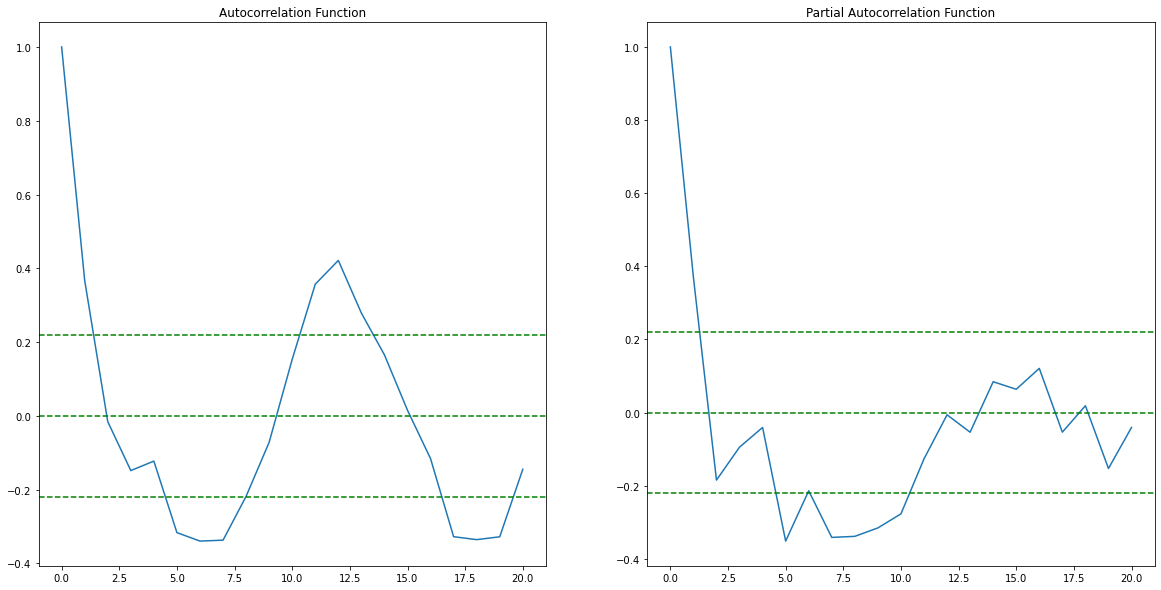

In [17]:
# ARIMA Model
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

In [25]:
# Arima Model
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['total gallons'])**2))
print('plotting ARIMA model')

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

<Figure size 1440x720 with 0 Axes>

In [26]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

months
2012-01-02    0.009299
2012-01-03   -0.045362
2012-01-04    0.028101
2012-01-05    0.161691
2012-01-06    0.189471
dtype: float64


In [27]:
# convert to cumulative sum
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

months
2012-01-02    0.009299
2012-01-03   -0.036063
2012-01-04   -0.007962
2012-01-05    0.153729
2012-01-06    0.343199
dtype: float64


In [28]:
predictions_log=pd.Series(data_log['total gallons'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

months
2012-01-01    14.458522
2012-01-02    14.332530
2012-01-03    14.306599
2012-01-04    14.719871
2012-01-05    15.418837
dtype: float64

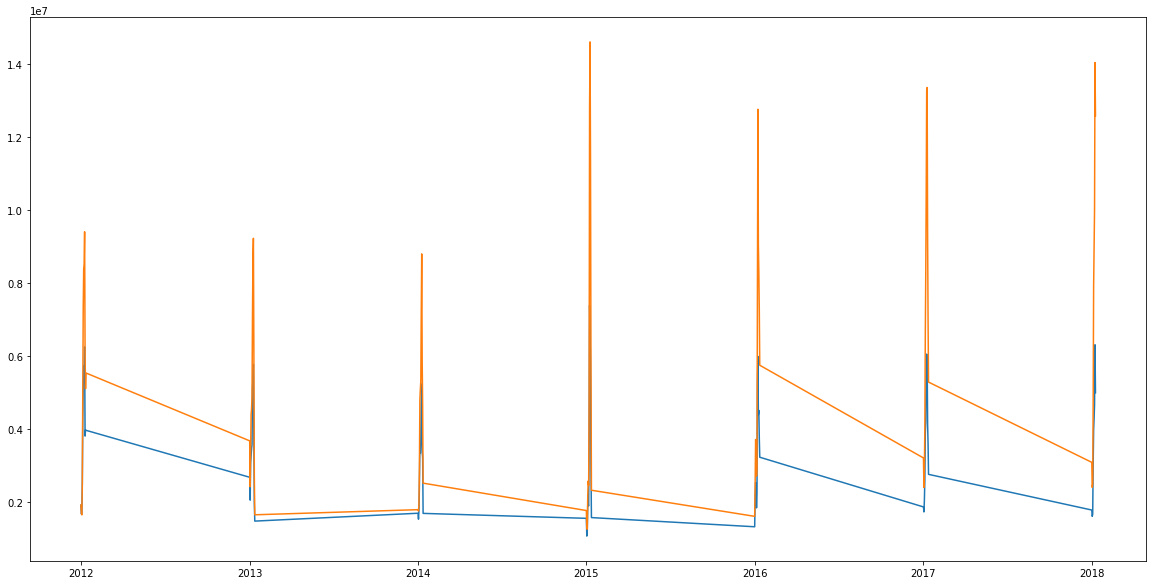

In [29]:

predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


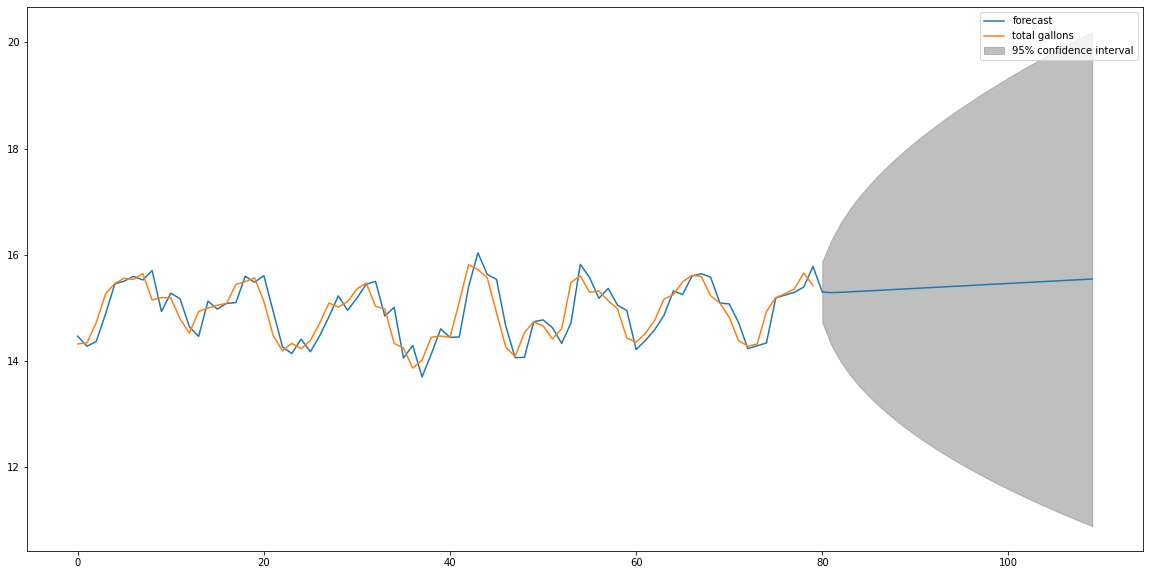

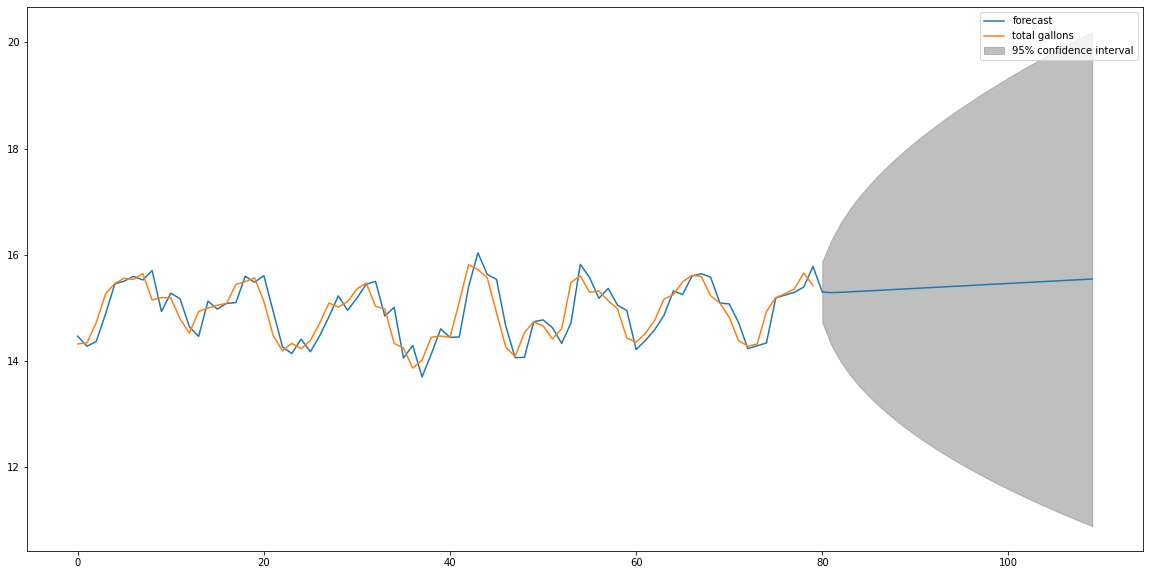

In [32]:

rcParams['figure.figsize']=20,10
results.plot_predict(1,110)

In [31]:
results.forecast(steps=24)

(array([15.29883246, 15.28828914, 15.29462474, 15.3034809 , 15.31271347,
        15.32200225, 15.33129942, 15.34059784, 15.34989646, 15.3591951 ,
        15.36849374, 15.37779238, 15.38709103, 15.39638967, 15.40568832,
        15.41498696, 15.42428561, 15.43358425, 15.4428829 , 15.45218154,
        15.46148019, 15.47077883, 15.48007748, 15.48937612]),
 array([0.29358866, 0.50969113, 0.67009386, 0.80041334, 0.91249997,
        1.01227689, 1.10306882, 1.18693654, 1.2652573 , 1.33900476,
        1.40889726, 1.4754827 , 1.53919035, 1.60036391, 1.6592837 ,
        1.71618184, 1.77125318, 1.82466314, 1.87655356, 1.92704722,
        1.97625118, 2.02425948, 2.07115528, 2.1170125 ]),
 array([[14.72340927, 15.87425566],
        [14.28931288, 16.28726539],
        [13.9812649 , 16.60798457],
        [13.73469958, 16.87226223],
        [13.52424639, 17.10118055],
        [13.337976  , 17.3060285 ],
        [13.16932425, 17.49327458],
        [13.01424498, 17.66695071],
        [12.87003772, 17.829